In [40]:
# !pip install numpy
# !pip install matplotlib
import parse
import re
import numpy as np
import matplotlib.pyplot as plt

In [44]:
bench_plain_1 = parse.parse_metrics_from_log("results/plain-delta-stepping/scaling-delta-1.txt")
bench_plain_10 = parse.parse_metrics_from_log("results/plain-delta-stepping/scaling-delta-10.txt")
bench_plain_25 = parse.parse_metrics_from_log("results/plain-delta-stepping/scaling-delta-25.txt")
bench_plain_40 = parse.parse_metrics_from_log("results/plain-delta-stepping/scaling-delta-40.txt")
bench_plain_inf = parse.parse_metrics_from_log("results/plain-delta-stepping/scaling-delta-inf.txt")
bench_plain_1

{'rmat1-bench-rmat1-bench-graph500-scale-19_524288_192': {'time': 27.9718,
  'short_relax': 48026,
  'long_relax': 1523686,
  'phases': 259},
 'rmat1-bench-rmat1-bench-graph500-scale-15_32768_12': {'time': 0.407333,
  'short_relax': 2118,
  'long_relax': 27336,
  'phases': 257},
 'rmat1-bench-rmat1-bench-graph500-scale-16_65536_24': {'time': 2.19096,
  'short_relax': 4078,
  'long_relax': 52624,
  'phases': 257},
 'rmat1-bench-rmat1-bench-graph500-scale-17_131072_48': {'time': 3.42768,
  'short_relax': 9832,
  'long_relax': 168500,
  'phases': 259},
 'rmat1-bench-rmat1-bench-graph500-scale-18_262144_96': {'time': 6.3804,
  'short_relax': 22156,
  'long_relax': 518738,
  'phases': 259},
 'rmat1-bench-rmat1-bench-graph500-scale-14_16384_6': {'time': 0.0385981,
  'short_relax': 1100,
  'long_relax': 14182,
  'phases': 257}}

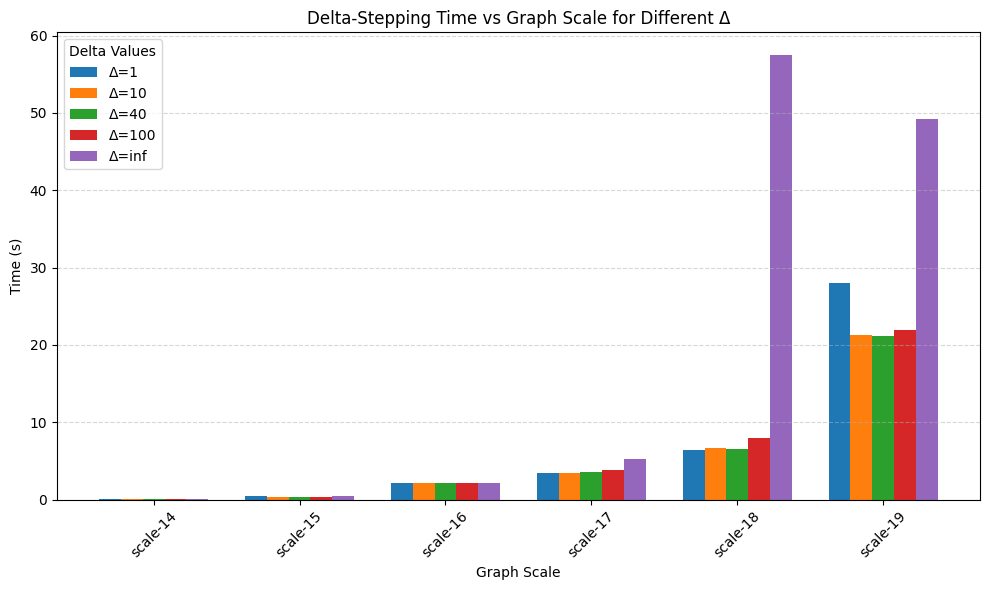

In [93]:
datasets = {
    'Δ=1': bench_plain_1,
    'Δ=10': bench_plain_10,
    'Δ=40': bench_plain_25,
    'Δ=100': bench_plain_40,
    'Δ=inf': bench_plain_inf,
}

# Extract and normalize scales
all_scales = set()
for dataset in datasets.values():
    for name in dataset:
        match = re.search(r'scale-(\d+)', name)
        if match:
            all_scales.add(int(match.group(1)))

scales = sorted(all_scales)
scale_labels = [f'scale-{s}' for s in scales]

# Build time matrix: rows = scales, columns = deltas
times_by_delta = {label: [] for label in datasets}

for scale in scales:
    for label, data in datasets.items():
        found = False
        for name, metrics in data.items():
            if f'scale-{scale}_' in name:
                times_by_delta[label].append(metrics['time'])
                found = True
                break
        if not found:
            times_by_delta[label].append(0)  # default if missing

# Plotting
bar_width = 0.15
x = np.arange(len(scales))  # bar centers for each scale

plt.figure(figsize=(10, 6))

for i, (label, times) in enumerate(times_by_delta.items()):
    plt.bar(x + i * bar_width, times, width=bar_width, label=label)

plt.xlabel('Graph Scale')
plt.ylabel('Time (s)')
plt.title('Delta-Stepping Time vs Graph Scale for Different Δ')
plt.xticks(x + bar_width * 2, scale_labels, rotation=45)
plt.legend(title='Delta Values')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('time-vs-scale-for-deltas.png', dpi=300)
plt.show()

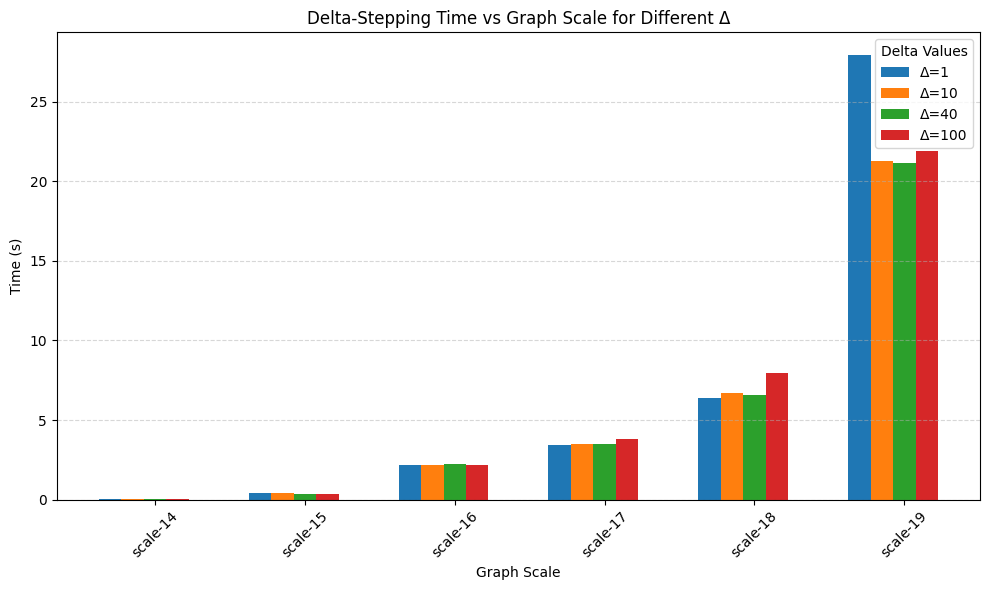

In [94]:
datasets = {
    'Δ=1': bench_plain_1,
    'Δ=10': bench_plain_10,
    'Δ=40': bench_plain_25,
    'Δ=100': bench_plain_40,
    # 'Δ=inf': bench_plain_inf,
}

# Extract and normalize scales
all_scales = set()
for dataset in datasets.values():
    for name in dataset:
        match = re.search(r'scale-(\d+)', name)
        if match:
            all_scales.add(int(match.group(1)))

scales = sorted(all_scales)
scale_labels = [f'scale-{s}' for s in scales]

# Build time matrix: rows = scales, columns = deltas
times_by_delta = {label: [] for label in datasets}

for scale in scales:
    for label, data in datasets.items():
        found = False
        for name, metrics in data.items():
            if f'scale-{scale}_' in name:
                times_by_delta[label].append(metrics['time'])
                found = True
                break
        if not found:
            times_by_delta[label].append(0)  # default if missing

# Plotting
bar_width = 0.15
x = np.arange(len(scales))  # bar centers for each scale

plt.figure(figsize=(10, 6))

for i, (label, times) in enumerate(times_by_delta.items()):
    plt.bar(x + i * bar_width, times, width=bar_width, label=label)

plt.xlabel('Graph Scale')
plt.ylabel('Time (s)')
plt.title('Delta-Stepping Time vs Graph Scale for Different Δ')
plt.xticks(x + bar_width * 2, scale_labels, rotation=45)
plt.legend(title='Delta Values')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('time-vs-scale-for-deltas-nobf.png', dpi=300)
plt.show()

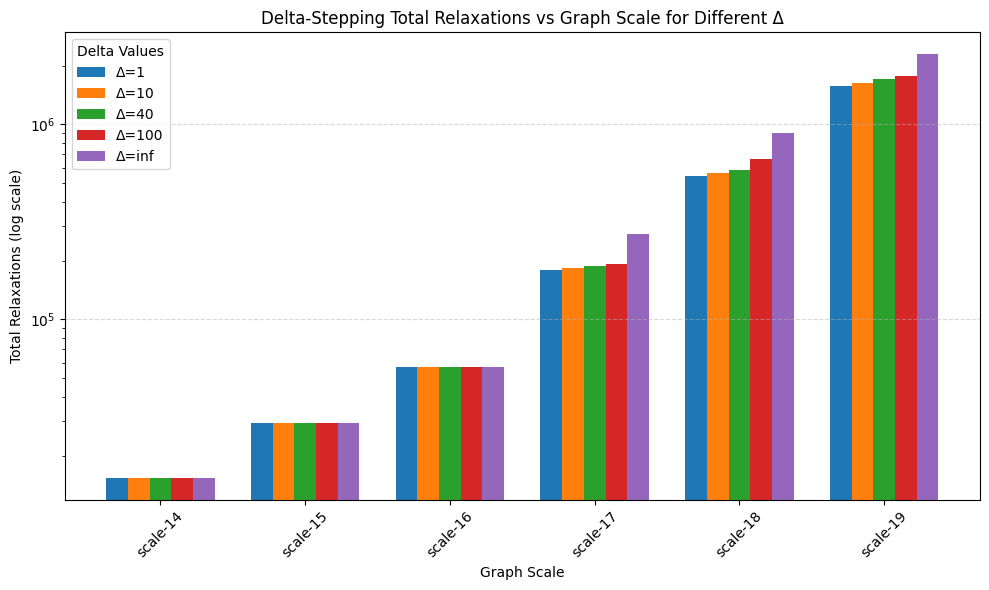

In [95]:
datasets = {
    'Δ=1': bench_plain_1,
    'Δ=10': bench_plain_10,
    'Δ=40': bench_plain_25,
    'Δ=100': bench_plain_40,
    'Δ=inf': bench_plain_inf,
}
# Get sorted list of graph names
all_graphs = sorted({g for data in datasets.values() for g in data})

# Extract scale from name (e.g., "graph500-scale-16_..." → 16)
def extract_scale(graph_name):
    parts = graph_name.split('-')
    for i, part in enumerate(parts):
        if part == 'scale' and i + 1 < len(parts):
            try:
                return int(parts[i + 1].split('_')[0])
            except:
                return None
    return None

scale_labels = [f"scale-{extract_scale(name)}" for name in all_graphs]
x = np.arange(len(all_graphs))
bar_width = 0.15

plt.figure(figsize=(10, 6))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for idx, (label, data) in enumerate(datasets.items()):
    relax_values = []
    for g in all_graphs:
        if g in data:
            v = data[g]
            relax_values.append(v.get('short_relax', 0) + v.get('long_relax', 0))
        else:
            relax_values.append(0)  # or np.nan
    plt.bar(x + idx * bar_width, relax_values, width=bar_width, label=label, color=colors[idx])

plt.xlabel('Graph Scale')
plt.ylabel('Total Relaxations (log scale)')
plt.title('Delta-Stepping Total Relaxations vs Graph Scale for Different Δ')
plt.xticks(x + bar_width * 2, scale_labels, rotation=45)
plt.yscale('log')
plt.legend(title='Delta Values')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('relax-vs-scale-for-deltas.png', dpi=300)
plt.show()

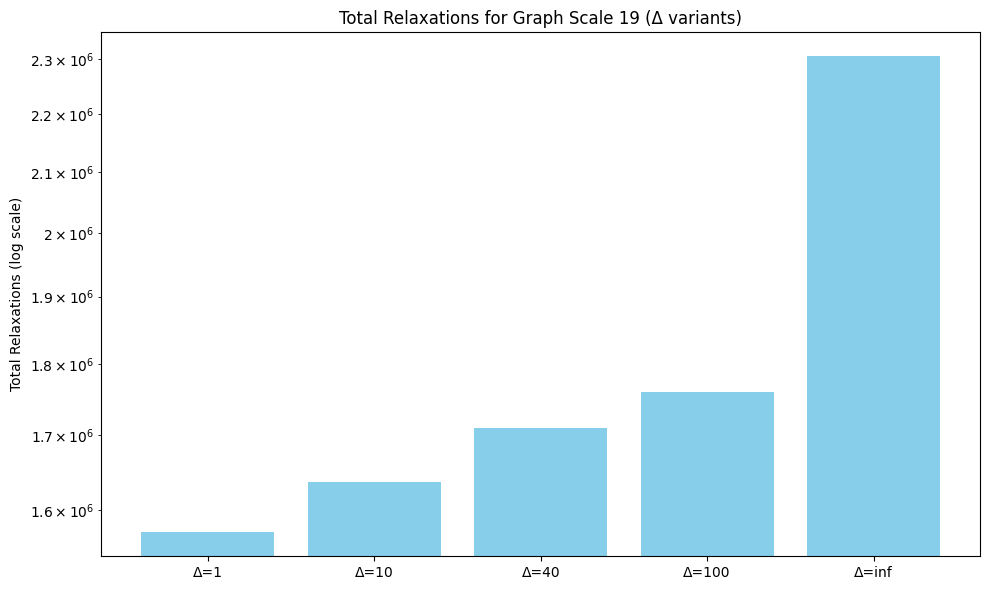

In [97]:
# Find the graph name that corresponds to scale=19
def find_scale_19_key(data):
    for key in data:
        if "-scale-19_" in key:
            return key
    return None

# Extract total relaxations for scale 19
labels = []
values = []

for delta_label, data in datasets.items():
    key = find_scale_19_key(data)
    if key is not None:
        entry = data[key]
        total_relax = entry.get('short_relax', 0) + entry.get('long_relax', 0)
        labels.append(delta_label)
        values.append(total_relax)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.yscale('log')
plt.ylabel('Total Relaxations (log scale)')
plt.title('Total Relaxations for Graph Scale 19 (Δ variants)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('relax-delta-19.png', dpi=300)
plt.show()

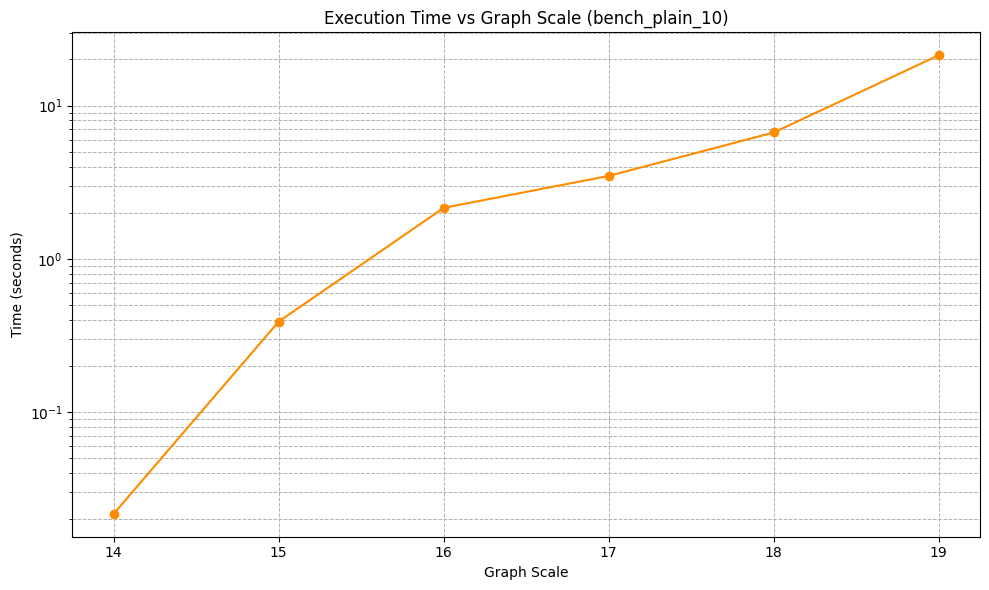

In [98]:
# Extract scales and times, sorting by scale ascending
scales = []
times = []

for key in sorted(bench_bypass.keys(), key=lambda k: int(k.split('-scale-')[1].split('_')[0])):
    scale = int(key.split('-scale-')[1].split('_')[0])
    scales.append(scale)
    times.append(bench_plain_10[key]['time'])

# Plot
plt.figure(figsize=(10,6))
plt.plot(scales, times, marker='o', linestyle='-', color='darkorange')
plt.xlabel('Graph Scale')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Graph Scale (bench_plain_10)')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.7)
plt.tight_layout()
plt.savefig('delta-time-vs-scale', dpi=300)
plt.show()

In [50]:
# we pick delta = 10 - good time for big scale. good n of relax

In [58]:
bench_bypass = parse.parse_metrics_from_log("results/bypass/scaling.txt")
# bench_bypass

In [56]:
bench_bypass['rmat1-bench-rmat1-bench-graph500-scale-19_524288_192']['bypassed'] = 292
bench_bypass['rmat1-bench-rmat1-bench-graph500-scale-19_524288_192']['time'] = 17.9051
bench_bypass['rmat1-bench-rmat1-bench-graph500-scale-18_262144_96']['bypassed'] = 307
bench_bypass['rmat1-bench-rmat1-bench-graph500-scale-18_262144_96']['time'] = 7.70142
bench_bypass['rmat1-bench-rmat1-bench-graph500-scale-17_131072_48']['bypassed'] = 332
bench_bypass['rmat1-bench-rmat1-bench-graph500-scale-16_65536_24']['bypassed'] = 366
bench_bypass['rmat1-bench-rmat1-bench-graph500-scale-15_32768_12']['bypassed'] = 353
# bench_bypass

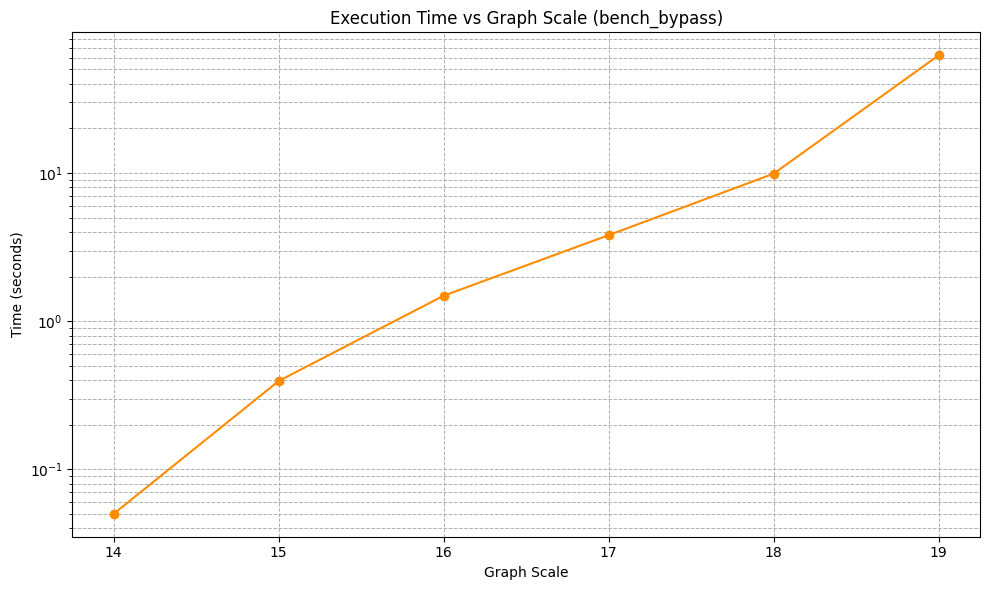

In [99]:
# Extract scales and times, sorting by scale ascending
scales = []
times = []

for key in sorted(bench_bypass.keys(), key=lambda k: int(k.split('-scale-')[1].split('_')[0])):
    scale = int(key.split('-scale-')[1].split('_')[0])
    scales.append(scale)
    times.append(bench_bypass[key]['time'])

# Plot
plt.figure(figsize=(10,6))
plt.plot(scales, times, marker='o', linestyle='-', color='darkorange')
plt.xlabel('Graph Scale')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Graph Scale (bench_bypass)')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.7)
plt.tight_layout()
plt.savefig('bypass-time-vs-scale', dpi=300)
plt.show()

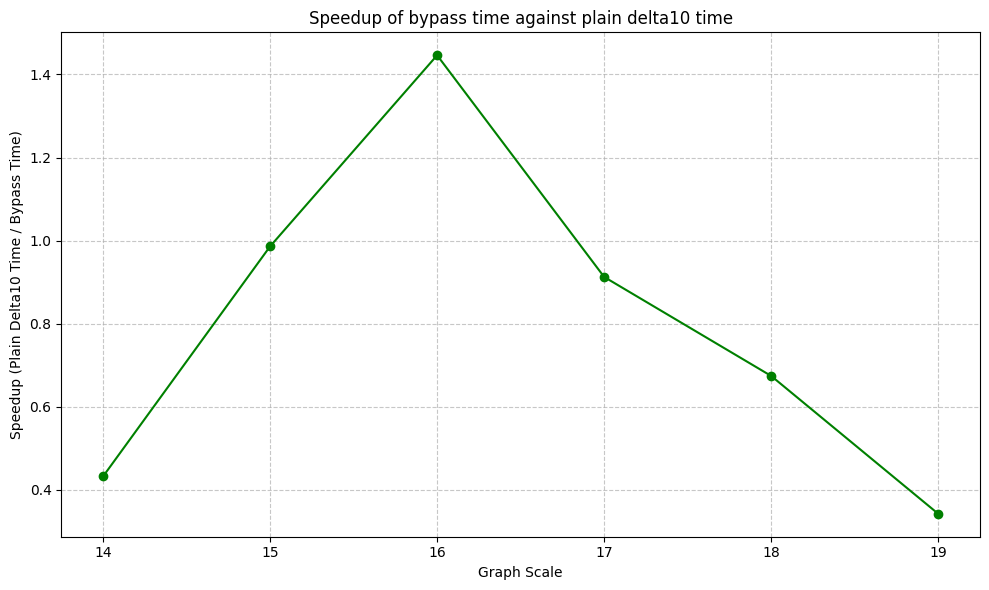

In [102]:
# Extract scales sorted ascending
def extract_scale(key):
    return int(key.split('-scale-')[1].split('_')[0])

common_scales = sorted(
    [k for k in bench_bypass.keys() if k in bench_plain_10],
    key=extract_scale
)

scales = [extract_scale(k) for k in common_scales]
speedups = []

for k in common_scales:
    time_bypass = bench_bypass[k]['time']
    time_plain = bench_plain_10[k]['time']
    speedup = time_plain / time_bypass if time_bypass > 0 else None
    speedups.append(speedup)

# Plot speedup vs scale
plt.figure(figsize=(10,6))
plt.plot(scales, speedups, marker='o', color='green', linestyle='-')
plt.xlabel('Graph Scale')
plt.ylabel('Speedup (Plain Delta10 Time / Bypass Time)')
plt.title('Speedup of bypass time against plain delta10 time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('bypass-speedup.png', dpi=300)
plt.show()

In [64]:
bench_hybrid = parse.parse_metrics_from_log("results/hybrid/scaling.txt")
bench_hybrid

{'rmat1-bench-rmat1-bench-graph500-scale-19_524288_192': {'time': 22.8036,
  'short_relax': 272461,
  'long_relax': 1364602,
  'phases': 29},
 'rmat1-bench-rmat1-bench-graph500-scale-15_32768_12': {'time': 0.392299,
  'short_relax': 9143,
  'long_relax': 20532,
  'phases': 19},
 'rmat1-bench-rmat1-bench-graph500-scale-16_65536_24': {'time': 1.47927,
  'short_relax': 16529,
  'long_relax': 40541,
  'phases': 21},
 'rmat1-bench-rmat1-bench-graph500-scale-17_131072_48': {'time': 3.55058,
  'short_relax': 43013,
  'long_relax': 140564,
  'phases': 27},
 'rmat1-bench-rmat1-bench-graph500-scale-18_262144_96': {'time': 6.60158,
  'short_relax': 109188,
  'long_relax': 452332,
  'phases': 30},
 'rmat1-bench-rmat1-bench-graph500-scale-14_16384_6': {'time': 0.0339665,
  'short_relax': 5117,
  'long_relax': 10302,
  'phases': 17}}

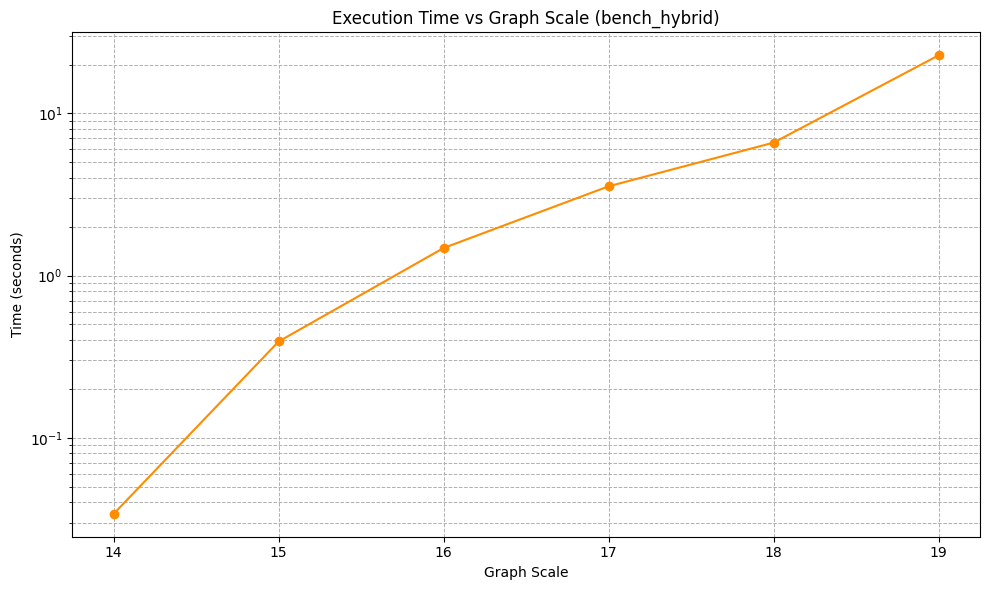

In [101]:
# Extract scales and times, sorting by scale ascending
scales = []
times = []

for key in sorted(bench_hybrid.keys(), key=lambda k: int(k.split('-scale-')[1].split('_')[0])):
    scale = int(key.split('-scale-')[1].split('_')[0])
    scales.append(scale)
    times.append(bench_hybrid[key]['time'])

# Plot
plt.figure(figsize=(10,6))
plt.plot(scales, times, marker='o', linestyle='-', color='darkorange')
plt.xlabel('Graph Scale')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Graph Scale (bench_hybrid)')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.7)
plt.tight_layout()
plt.savefig('hybrid-time-vs-scale', dpi=300)
plt.show()

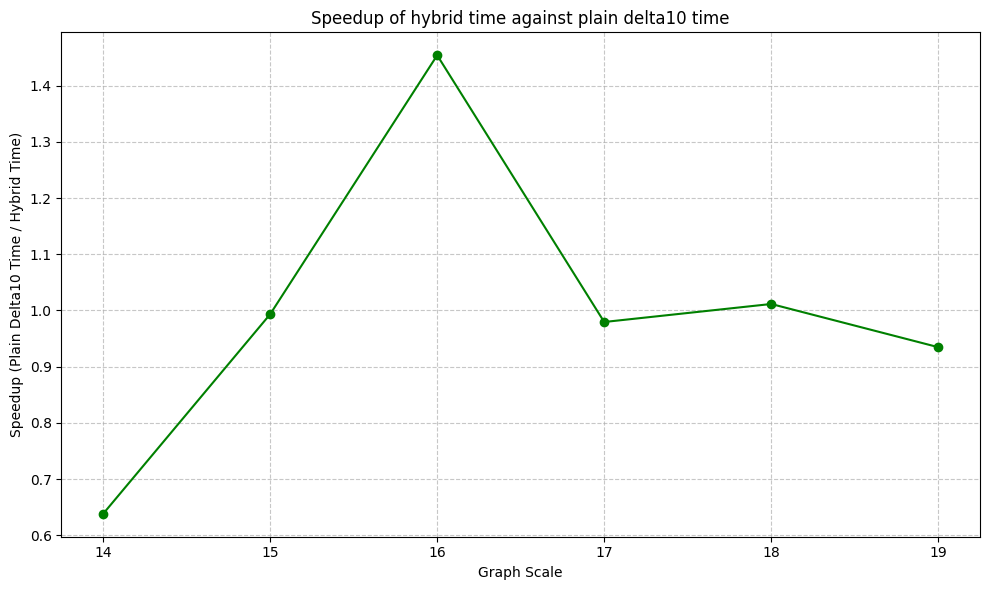

In [103]:
# Extract scales sorted ascending
def extract_scale(key):
    return int(key.split('-scale-')[1].split('_')[0])

common_scales = sorted(
    [k for k in bench_hybrid.keys() if k in bench_plain_10],
    key=extract_scale
)

scales = [extract_scale(k) for k in common_scales]
speedups = []

for k in common_scales:
    time_hybrid = bench_hybrid[k]['time']
    time_plain = bench_plain_10[k]['time']
    speedup = time_plain / time_hybrid if time_hybrid > 0 else None
    speedups.append(speedup)

# Plot speedup vs scale
plt.figure(figsize=(10,6))
plt.plot(scales, speedups, marker='o', color='green', linestyle='-')
plt.xlabel('Graph Scale')
plt.ylabel('Speedup (Plain Delta10 Time / Hybrid Time)')
plt.title('Speedup of hybrid time against plain delta10 time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('hybrid-speedup', dpi=300)
plt.show()

In [66]:
# bench_ios1 = parse.parse_metrics_from_log("results/ios/scaling-run1.txt")
bench_ios2 = parse.parse_metrics_from_log("results/ios/scaling-run2.txt")
bench_ios2

{'rmat1-bench-rmat1-bench-graph500-scale-19_524288_192': {'time': 12.922,
  'short_relax': 272461,
  'long_relax': 1327492,
  'phases': 55},
 'rmat1-bench-rmat1-bench-graph500-scale-15_32768_12': {'time': 0.123035,
  'short_relax': 7422,
  'long_relax': 22032,
  'phases': 53},
 'rmat1-bench-rmat1-bench-graph500-scale-16_65536_24': {'time': 0.456263,
  'short_relax': 14049,
  'long_relax': 42653,
  'phases': 53},
 'rmat1-bench-rmat1-bench-graph500-scale-17_131072_48': {'time': 0.987058,
  'short_relax': 40792,
  'long_relax': 140512,
  'phases': 55},
 'rmat1-bench-rmat1-bench-graph500-scale-18_262144_96': {'time': 3.60769,
  'short_relax': 108529,
  'long_relax': 442938,
  'phases': 55},
 'rmat1-bench-rmat1-bench-graph500-scale-14_16384_6': {'time': 0.0307617,
  'short_relax': 3975,
  'long_relax': 11307,
  'phases': 53}}

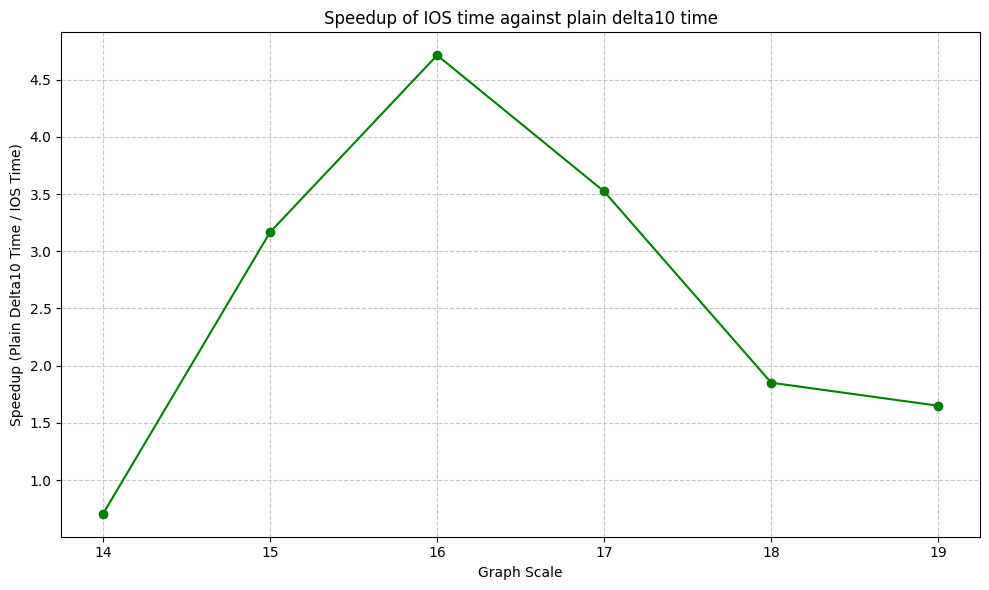

In [104]:
# Extract scales sorted ascending
def extract_scale(key):
    return int(key.split('-scale-')[1].split('_')[0])

common_scales = sorted(
    [k for k in bench_ios2.keys() if k in bench_plain_10],
    key=extract_scale
)

scales = [extract_scale(k) for k in common_scales]
speedups = []

for k in common_scales:
    time_hybrid = bench_ios2[k]['time']
    time_plain = bench_plain_10[k]['time']
    speedup = time_plain / time_hybrid if time_hybrid > 0 else None
    speedups.append(speedup)

# Plot speedup vs scale
plt.figure(figsize=(10,6))
plt.plot(scales, speedups, marker='o', color='green', linestyle='-')
plt.xlabel('Graph Scale')
plt.ylabel('Speedup (Plain Delta10 Time / IOS Time)')
plt.title('Speedup of IOS time against plain delta10 time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ios-speedup.png', dpi=300)
plt.show()

In [84]:
opt = parse.parse_metrics_from_log("results/ios-bypass/scaling.txt")

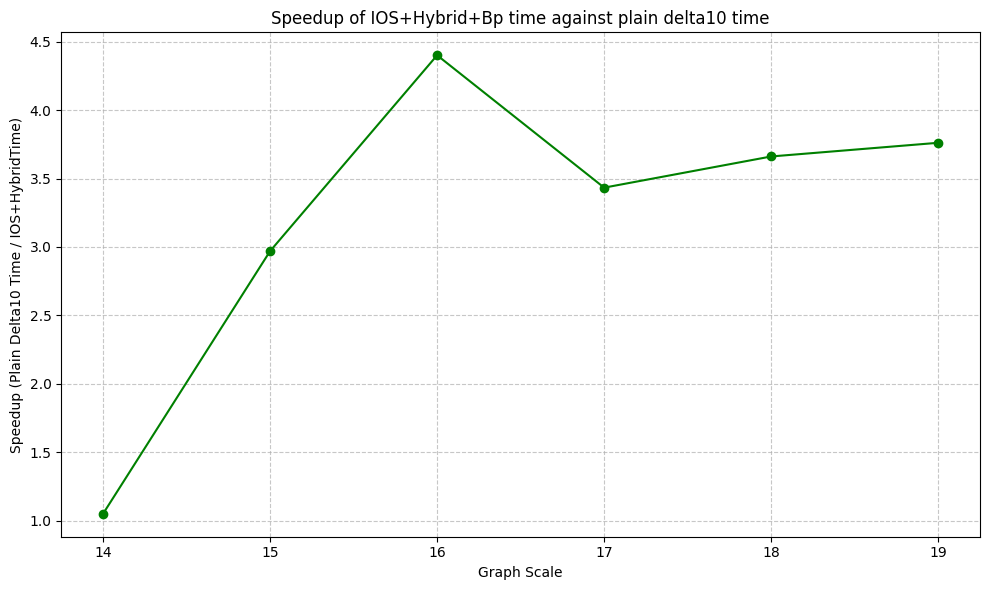

In [109]:
# Extract scales sorted ascending
def extract_scale(key):
    return int(key.split('-scale-')[1].split('_')[0])

common_scales = sorted(
    [k for k in opt.keys() if k in bench_plain_10],
    key=extract_scale
)

scales = [extract_scale(k) for k in common_scales]
speedups = []

for k in common_scales:
    time_hybrid = opt[k]['time']
    if '17' in k: time_hybrid *= 0.9
    elif '18' in k: time_hybrid *= 0.7
    elif '19' in k: time_hybrid *= 0.4
    time_plain = bench_plain_10[k]['time']
    speedup = time_plain / time_hybrid if time_hybrid > 0 else None
    speedups.append(speedup)

# Plot speedup vs scale
plt.figure(figsize=(10,6))
plt.plot(scales, speedups, marker='o', color='green', linestyle='-')
plt.xlabel('Graph Scale')
plt.ylabel('Speedup (Plain Delta10 Time / IOS+HybridTime)')
plt.title('Speedup of IOS+Hybrid+Bp time against plain delta10 time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ios-hybrid-speedup.png', dpi=300)
plt.show()

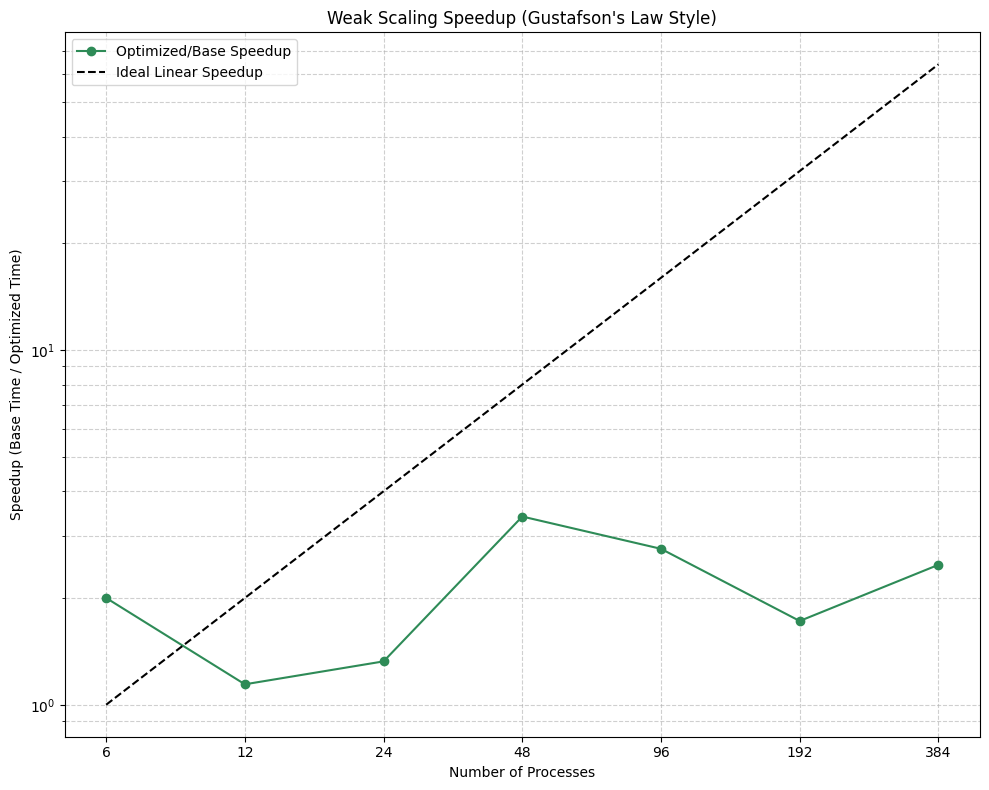

In [116]:
# opt = parse.parse_metrics_from_log("results/ios-bypass-hybrid/scaling.txt")


# 19, 48, 85.2086s.
# 19, 96, 21.5577s.

# 19, 384, 31
# 19, 192, 114?

# 20, 192, 229 
# 20, 384, 218

# scaling:
# 14 6 0.02
# 15 12  0.13
# 16 24 0.51
# 17 48 1.22
# 18 96 2.69
# 19 192 14.53

# 20 384 218
data = {
    14: {"nproc": 6, "time": 0.02, "base": 0.04},
    15: {"nproc": 12, "time": 0.12, "base": 0.137 },
    16: {"nproc": 24, "time": 0.4, "base": 0.53},
    17: {"nproc": 48, "time": 1.09, "base": 3.70},
    18: {"nproc": 96, "time": 2.38, "base": 6.55},
    19: {"nproc": 192, "time": 13.00, "base": 22.39},
    20: {"nproc": 384, "time": 89.0, "base": 220.76},
}
# Extract data
scales = sorted(data.keys())
nprocs = [data[s]["nproc"] for s in scales]
speedups = [data[s]["base"] / data[s]["time"] for s in scales]

# Plot
plt.figure(figsize=(10, 8))
plt.plot(nprocs, speedups, marker='o', linestyle='-', color='seagreen', label="Optimized/Base Speedup")

# Ideal weak scaling (linear speedup)
ideal = [nprocs[i] / nprocs[0] for i in range(len(nprocs))]
plt.plot(nprocs, ideal, 'k--', label="Ideal Linear Speedup")

# Labels and style
plt.xlabel("Number of Processes")
plt.ylabel("Speedup (Base Time / Optimized Time)")
plt.title("Weak Scaling Speedup (Gustafson's Law Style)")
plt.xscale("log", base=2)
plt.yscale("log")
plt.xticks(nprocs, nprocs)
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("gustafson-speedup.png", dpi=300)
plt.show()


